In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
import scipy.stats as stats
from scipy.stats import normaltest
import scipy
from scipy.stats import kstest

In [2]:
hour=pd.read_csv("hour.csv")
day=pd.read_csv("day.csv")

In [3]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour.shape

(17379, 17)

In [5]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
day.shape

(731, 16)

#### Checking for null values

In [7]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour["temp"].isnull==True

False

In [9]:
hour.drop("instant",axis=1,inplace=True)

In [10]:
num=[feature for feature in hour.columns if hour[feature].dtype!="O"]

In [11]:
num

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [12]:
len(num)

15

In [13]:
num_dis=[feature for feature in num if len(hour[feature].unique())<=25]

In [14]:
num_dis

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

In [15]:
len(num_dis)

8

In [16]:
num_num=[feature for feature in num if feature not in num_dis]

In [17]:
num_num

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [18]:
len(num_num)

7

<AxesSubplot:>

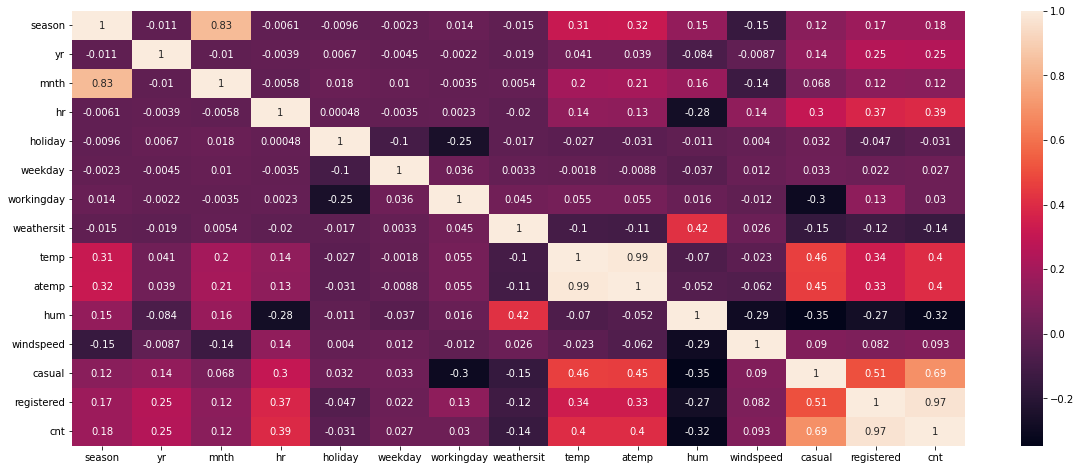

In [19]:
plt.figure(figsize=(20,8))
sns.heatmap(hour.corr(),annot=True)

#### Handling Ouliers

In [20]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [21]:
hour.season.shape[0]

17379

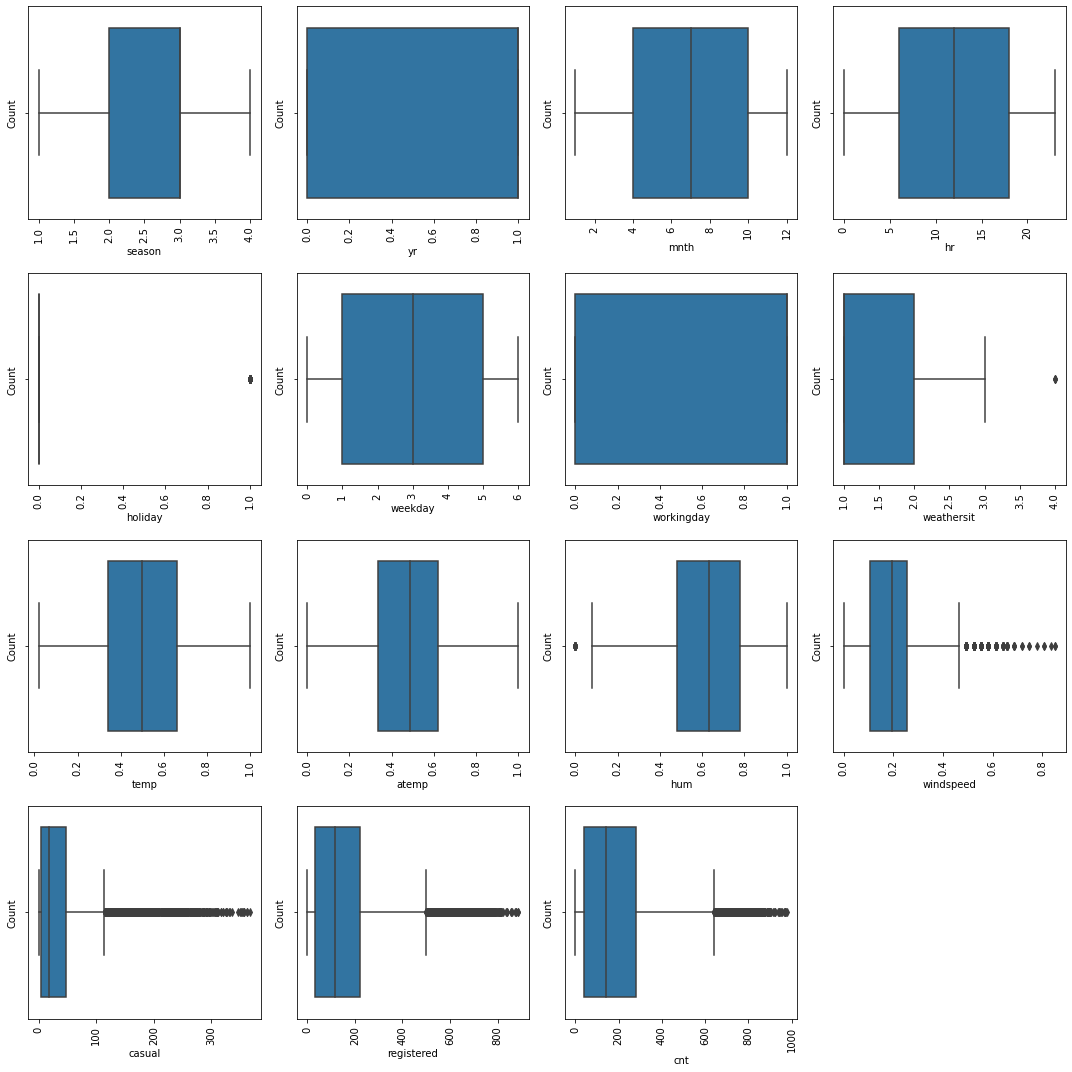

In [22]:
plt.figure(figsize=(15,15))
plotno=1
for columns in num:
    if plotno<=16:
        plt.subplot(4,4,plotno)
        sns.boxplot(x=hour[columns])
        plt.xlabel(columns)
        plt.ylabel("Count")
        plt.xticks(rotation=90)
    plotno+=1
plt.tight_layout()

In [23]:
def detect_outliers(data,col):
    outliers=[]
    data[col] = sorted(data[col])
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    print("The upper bound is: ",upr_bound)
    print("The lower bound is: ",lwr_bound)
    print("-"*50)
    print("The Length of Upper Limit is: ",len(data.loc[data[col] > upr_bound]))
    print("The Length of Lower Limit is: ",len(data.loc[data[col] < lwr_bound]))
    print("-"*50)
    print("Percentage of Outliers for Upper Limit: ",(len(data.loc[data[col] > upr_bound]))/(data[col].shape[0])*100,"%")
    print("Percentage of Outliers for Lower Limit: ",(len(data.loc[data[col] < lwr_bound]))/(data[col].shape[0])*100,"%")
    print("-"*50)
    print("The Outliers in the Upper Bound  are: \n",(pd.DataFrame(data.loc[data[col] > upr_bound])))
    print("-"*50)
    print("The Outliers in the Lower Bound  are: \n",(pd.DataFrame(data.loc[data[col] < lwr_bound])))
    print("-"*50)
    
    for i in data[col]:
        if i<lwr_bound or i>upr_bound:
            outliers.append(i)
    return outliers

In [24]:
hour.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [25]:
detect_outliers(hour,"season")

The upper bound is:  4.5
The lower bound is:  0.5
--------------------------------------------------
The Length of Upper Limit is:  0
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.0 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
The Outliers in the Lower Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------


[]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season'>

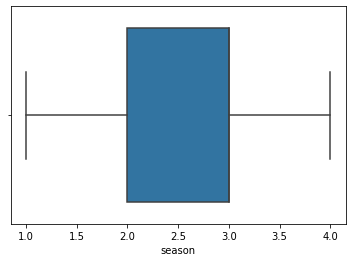

In [26]:
sns.boxplot(hour.season)

In [27]:
detect_outliers(hour,"yr")

The upper bound is:  2.5
The lower bound is:  -1.5
--------------------------------------------------
The Length of Upper Limit is:  0
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.0 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
The Outliers in the Lower Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------


[]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yr'>

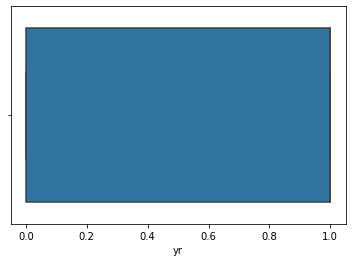

In [28]:
sns.boxplot(hour.yr)

In [29]:
detect_outliers(hour,"mnth")

The upper bound is:  19.0
The lower bound is:  -5.0
--------------------------------------------------
The Length of Upper Limit is:  0
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.0 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
The Outliers in the Lower Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------


[]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth'>

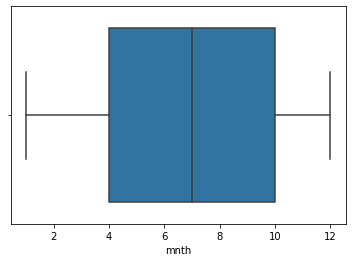

In [30]:
sns.boxplot(hour.mnth)

In [31]:
detect_outliers(hour,"hr")

The upper bound is:  36.0
The lower bound is:  -12.0
--------------------------------------------------
The Length of Upper Limit is:  0
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.0 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
The Outliers in the Lower Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------


[]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr'>

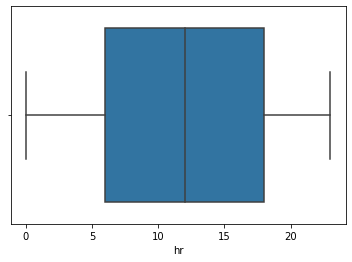

In [32]:
sns.boxplot(hour.hr)

C:\Users\arink\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='holiday', ylabel='Density'>

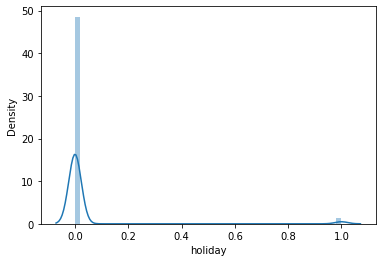

In [33]:
sns.distplot(hour.holiday)

In [34]:
hour.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [35]:
detect_outliers(hour,"holiday")

The upper bound is:  0.0
The lower bound is:  0.0
--------------------------------------------------
The Length of Upper Limit is:  500
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  2.8770355026181025 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
            dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
16879  2012-12-11       4   1    12  23        1        2           1   
16880  2012-12-11       4   1    12  23        1        2           1   
16881  2012-12-11       4   1    12  23        1        2           1   
16882  2012-12-11       4   1    12  23        1        2           1   
16883  2012-12-11       4   1    12  23        1        2           1   
...           ...     ...  ..   ...  ..      ...      ...         ...   
17374  2012-12-31       4   1    12  23        1        1           1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday'>

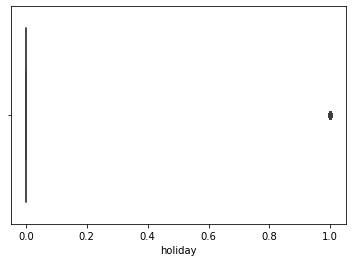

In [36]:
sns.boxplot(hour.holiday)

In [37]:
hour.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [38]:
detect_outliers(hour,"weekday")

The upper bound is:  11.0
The lower bound is:  -5.0
--------------------------------------------------
The Length of Upper Limit is:  0
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.0 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
The Outliers in the Lower Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------


[]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday'>

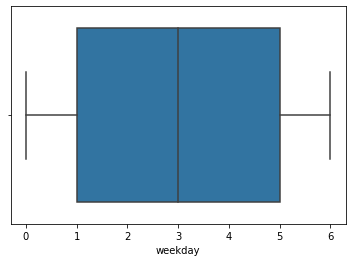

In [39]:
sns.boxplot(hour.weekday)

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday'>

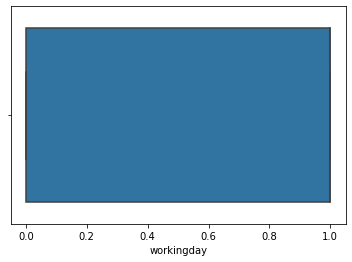

In [40]:
sns.boxplot(hour.workingday)

In [41]:
detect_outliers(hour,"workingday")

The upper bound is:  2.5
The lower bound is:  -1.5
--------------------------------------------------
The Length of Upper Limit is:  0
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.0 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
The Outliers in the Lower Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------


[]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weathersit'>

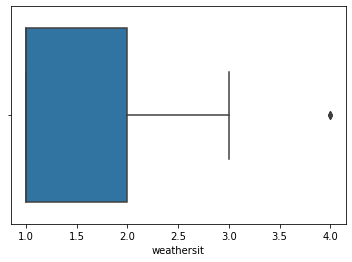

In [42]:
sns.boxplot(hour.weathersit)

In [43]:
detect_outliers(hour,"weathersit")

The upper bound is:  3.5
The lower bound is:  -0.5
--------------------------------------------------
The Length of Upper Limit is:  3
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.017262213015708613 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
            dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
17376  2012-12-31       4   1    12  23        1        6           1   
17377  2012-12-31       4   1    12  23        1        6           1   
17378  2012-12-31       4   1    12  23        1        6           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
17376           4  0.26  0.2576  0.60     0.1642       7          83   90  
17377           4  0.26  0.2727  0.56     0.1343      13          48   61  
17378           4  0.26  0.2727  0.65     0.1343      12  

[4, 4, 4]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

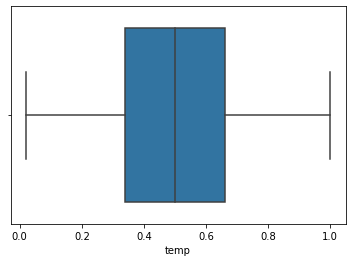

In [44]:
sns.boxplot(hour.temp)

In [45]:
detect_outliers(hour,"temp")

The upper bound is:  1.1400000000000001
The lower bound is:  -0.13999999999999996
--------------------------------------------------
The Length of Upper Limit is:  0
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.0 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
The Outliers in the Lower Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------


[]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

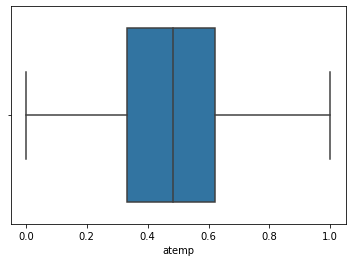

In [46]:
sns.boxplot(hour.atemp)

In [47]:
detect_outliers(hour,"atemp")

The upper bound is:  1.0530499999999998
The lower bound is:  -0.09854999999999997
--------------------------------------------------
The Length of Upper Limit is:  0
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.0 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
The Outliers in the Lower Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------


[]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

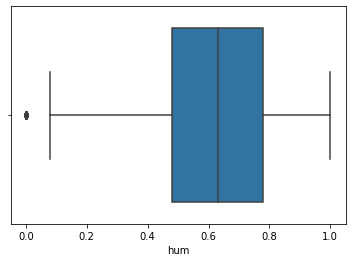

In [48]:
sns.boxplot(hour.hum)

In [49]:
detect_outliers(hour,"hum")

The upper bound is:  1.23
The lower bound is:  0.029999999999999916
--------------------------------------------------
The Length of Upper Limit is:  0
The Length of Lower Limit is:  22
--------------------------------------------------
Percentage of Outliers for Upper Limit:  0.0 %
Percentage of Outliers for Lower Limit:  0.1265895621151965 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
 Empty DataFrame
Columns: [dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
--------------------------------------------------
The Outliers in the Lower Bound  are: 
         dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0   2011-01-01       1   0     1   0        0        0           0   
1   2011-01-01       1   0     1   0        0        0           0   
2   2011-01-01       1   0     1   0        0        0           0   
3   2011-01-01       1   0    

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

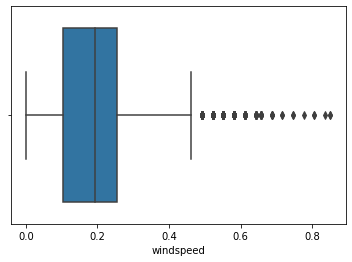

In [50]:
sns.boxplot(hour.windspeed)

In [51]:
detect_outliers(hour,"windspeed")

The upper bound is:  0.4775
The lower bound is:  -0.1193
--------------------------------------------------
The Length of Upper Limit is:  342
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  1.9678922837907822 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
            dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
17037  2012-12-17       4   1    12  23        1        6           1   
17038  2012-12-17       4   1    12  23        1        6           1   
17039  2012-12-17       4   1    12  23        1        6           1   
17040  2012-12-17       4   1    12  23        1        6           1   
17041  2012-12-17       4   1    12  23        1        6           1   
...           ...     ...  ..   ...  ..      ...      ...         ...   
17374  2012-12-31       4   1    12  23        1        6     

[0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 0.4925,
 

In [52]:
hour.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='casual'>

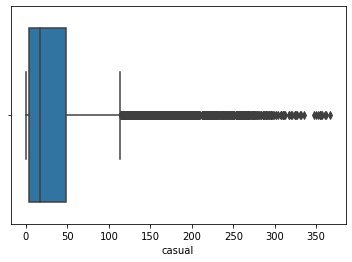

In [53]:
sns.boxplot(hour.casual)

In [54]:
detect_outliers(hour,"casual")

The upper bound is:  114.0
The lower bound is:  -62.0
--------------------------------------------------
The Length of Upper Limit is:  1192
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  6.858852638241555 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
            dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
16187  2012-11-12       4   1    12  22        0        6           1   
16188  2012-11-12       4   1    12  22        0        6           1   
16189  2012-11-12       4   1    12  22        0        6           1   
16190  2012-11-12       4   1    12  22        0        6           1   
16191  2012-11-12       4   1    12  22        0        6           1   
...           ...     ...  ..   ...  ..      ...      ...         ...   
17374  2012-12-31       4   1    12  23        1        6        

[115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 116,
 116,
 116,
 116,
 116,
 116,
 116,
 116,
 116,
 116,
 116,
 116,
 116,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 117,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 125,
 125

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='registered'>

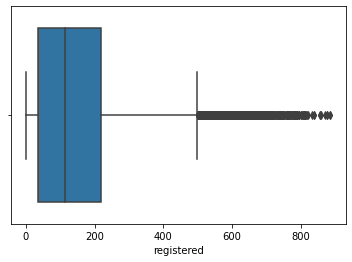

In [55]:
sns.boxplot(hour.registered)

In [56]:
detect_outliers(hour,"registered")

The upper bound is:  499.0
The lower bound is:  -245.0
--------------------------------------------------
The Length of Upper Limit is:  680
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  3.9127682835606192 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
            dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
16699  2012-12-03       4   1    12  23        0        6           1   
16700  2012-12-03       4   1    12  23        0        6           1   
16701  2012-12-03       4   1    12  23        0        6           1   
16702  2012-12-03       4   1    12  23        0        6           1   
16703  2012-12-03       4   1    12  23        0        6           1   
...           ...     ...  ..   ...  ..      ...      ...         ...   
17374  2012-12-31       4   1    12  23        1        6       

[500,
 500,
 500,
 500,
 501,
 501,
 501,
 501,
 502,
 502,
 502,
 502,
 503,
 503,
 503,
 504,
 504,
 504,
 504,
 505,
 505,
 505,
 506,
 506,
 506,
 506,
 506,
 507,
 507,
 507,
 507,
 508,
 508,
 508,
 508,
 509,
 509,
 509,
 509,
 509,
 510,
 510,
 510,
 510,
 510,
 511,
 511,
 511,
 512,
 512,
 512,
 512,
 513,
 513,
 513,
 513,
 514,
 514,
 514,
 514,
 514,
 514,
 514,
 514,
 514,
 515,
 515,
 515,
 515,
 516,
 516,
 516,
 516,
 516,
 517,
 517,
 517,
 517,
 518,
 518,
 519,
 519,
 520,
 521,
 522,
 522,
 522,
 523,
 523,
 523,
 523,
 523,
 523,
 523,
 524,
 524,
 524,
 524,
 525,
 525,
 525,
 525,
 526,
 527,
 527,
 527,
 527,
 527,
 529,
 529,
 529,
 529,
 530,
 530,
 530,
 531,
 531,
 531,
 531,
 532,
 532,
 532,
 532,
 532,
 533,
 533,
 533,
 533,
 533,
 534,
 534,
 534,
 534,
 534,
 534,
 534,
 535,
 536,
 536,
 537,
 537,
 537,
 537,
 538,
 539,
 539,
 539,
 539,
 539,
 539,
 539,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 541,
 542,
 542,
 542,
 542,
 543,
 543,
 543,
 543

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

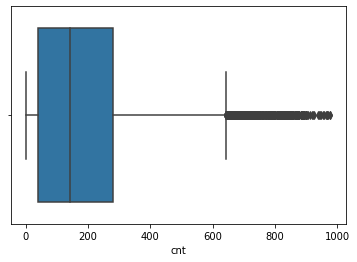

In [57]:
sns.boxplot(hour.cnt)

In [58]:
detect_outliers(hour,"cnt")

The upper bound is:  642.5
The lower bound is:  -321.5
--------------------------------------------------
The Length of Upper Limit is:  505
The Length of Lower Limit is:  0
--------------------------------------------------
Percentage of Outliers for Upper Limit:  2.905805857644283 %
Percentage of Outliers for Lower Limit:  0.0 %
--------------------------------------------------
The Outliers in the Upper Bound  are: 
            dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
16874  2012-12-10       4   1    12  23        0        6           1   
16875  2012-12-10       4   1    12  23        0        6           1   
16876  2012-12-10       4   1    12  23        0        6           1   
16877  2012-12-11       4   1    12  23        0        6           1   
16878  2012-12-11       4   1    12  23        0        6           1   
...           ...     ...  ..   ...  ..      ...      ...         ...   
17374  2012-12-31       4   1    12  23        1        6        

[643,
 643,
 643,
 643,
 643,
 643,
 644,
 644,
 644,
 644,
 644,
 645,
 645,
 646,
 646,
 646,
 646,
 646,
 646,
 647,
 647,
 647,
 648,
 648,
 648,
 649,
 649,
 649,
 649,
 649,
 650,
 651,
 651,
 651,
 651,
 652,
 653,
 653,
 653,
 653,
 653,
 654,
 654,
 654,
 654,
 654,
 654,
 654,
 654,
 655,
 655,
 656,
 656,
 656,
 657,
 657,
 658,
 658,
 659,
 659,
 659,
 660,
 661,
 662,
 662,
 662,
 662,
 662,
 663,
 663,
 664,
 664,
 664,
 665,
 665,
 665,
 665,
 666,
 666,
 667,
 667,
 668,
 668,
 668,
 668,
 668,
 668,
 668,
 668,
 669,
 669,
 670,
 671,
 671,
 671,
 671,
 671,
 672,
 672,
 672,
 673,
 673,
 673,
 674,
 674,
 675,
 676,
 676,
 676,
 677,
 677,
 678,
 678,
 678,
 678,
 678,
 678,
 679,
 679,
 679,
 679,
 679,
 680,
 680,
 680,
 680,
 681,
 681,
 681,
 681,
 681,
 681,
 682,
 682,
 682,
 683,
 683,
 683,
 684,
 684,
 684,
 685,
 686,
 686,
 686,
 686,
 686,
 686,
 687,
 687,
 687,
 688,
 688,
 688,
 689,
 689,
 690,
 690,
 691,
 691,
 691,
 691,
 691,
 691,
 692,
 692,
 692

In [59]:
hour.cnt.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

#### Holiday:
- The upper bound is:  0.0
- The lower bound is:  0.0
--------------------------------------------------
- The Length of Upper Limit is:  500
- The Length of Lower Limit is:  0
--------------------------------------------------
- Percentage of Outliers for Upper Limit:  2.8770355026181025 %
- Percentage of Outliers for Lower Limit:  0.0%

#### Weathersit:
- The upper bound is:  3.5
- The lower bound is:  -0.5
--------------------------------------------------
- The Length of Upper Limit is:  3
- The Length of Lower Limit is:  0
--------------------------------------------------
- Percentage of Outliers for Upper Limit:  0.017262213015708613 %
- Percentage of Outliers for Lower Limit:  0.0 %

#### Humidity:
- The upper bound is:  1.23
- The lower bound is:  0.029999999999999916
--------------------------------------------------
- The Length of Upper Limit is:  0
- The Length of Lower Limit is:  22
--------------------------------------------------
- Percentage of Outliers for Upper Limit:  0.0 %
- Percentage of Outliers for Lower Limit:  0.1265895621151965 %

#### Windspeed:
- The upper bound is:  0.4775
- The lower bound is:  -0.1193
--------------------------------------------------
- The Length of Upper Limit is:  342
- The Length of Lower Limit is:  0
--------------------------------------------------
- Percentage of Outliers for Upper Limit:  1.9678922837907822 %
- Percentage of Outliers for Lower Limit:  0.0 %

#### Casual:
- The upper bound is:  114.0
- The lower bound is:  -62.0
--------------------------------------------------
- The Length of Upper Limit is:  1192
- The Length of Lower Limit is:  0
--------------------------------------------------
- Percentage of Outliers for Upper Limit:  6.858852638241555 %
- Percentage of Outliers for Lower Limit:  0.0 %

#### Registered:
- The upper bound is:  499.0
- The lower bound is:  -245.0
--------------------------------------------------
- The Length of Upper Limit is:  680
- The Length of Lower Limit is:  0
--------------------------------------------------
- Percentage of Outliers for Upper Limit:  3.9127682835606192 %
- Percentage of Outliers for Lower Limit:  0.0 %
-----------------------------------------------

#### Count:
- The upper bound is:  642.5
- The lower bound is:  -321.5
--------------------------------------------------
- The Length of Upper Limit is:  505
- The Length of Lower Limit is:  0
--------------------------------------------------
- Percentage of Outliers for Upper Limit:  2.905805857644283 %
- Percentage of Outliers for Lower Limit:  0.0 %

outliers= ["holiday","weathersit","hum","windspeed","casual","registered","cnt"]

In [60]:
hour.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [61]:
hour.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [62]:
def treat_outliers(data,col):
    data[col] = sorted(data[col])
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #Replacing Outliers with Mean
    data.loc[data.loc[:, col] <lwr_bound, col] = data[col].median()
    data.loc[data.loc[:, col] > upr_bound, col] = data[col].median()
    
    return sns.boxplot(data[col])

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

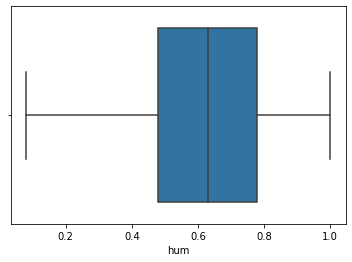

In [63]:
treat_outliers(hour,"hum")

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

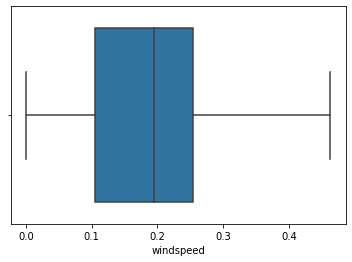

In [64]:
treat_outliers(hour,"windspeed")

#### null

In [65]:
hour.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Skewness

In [66]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


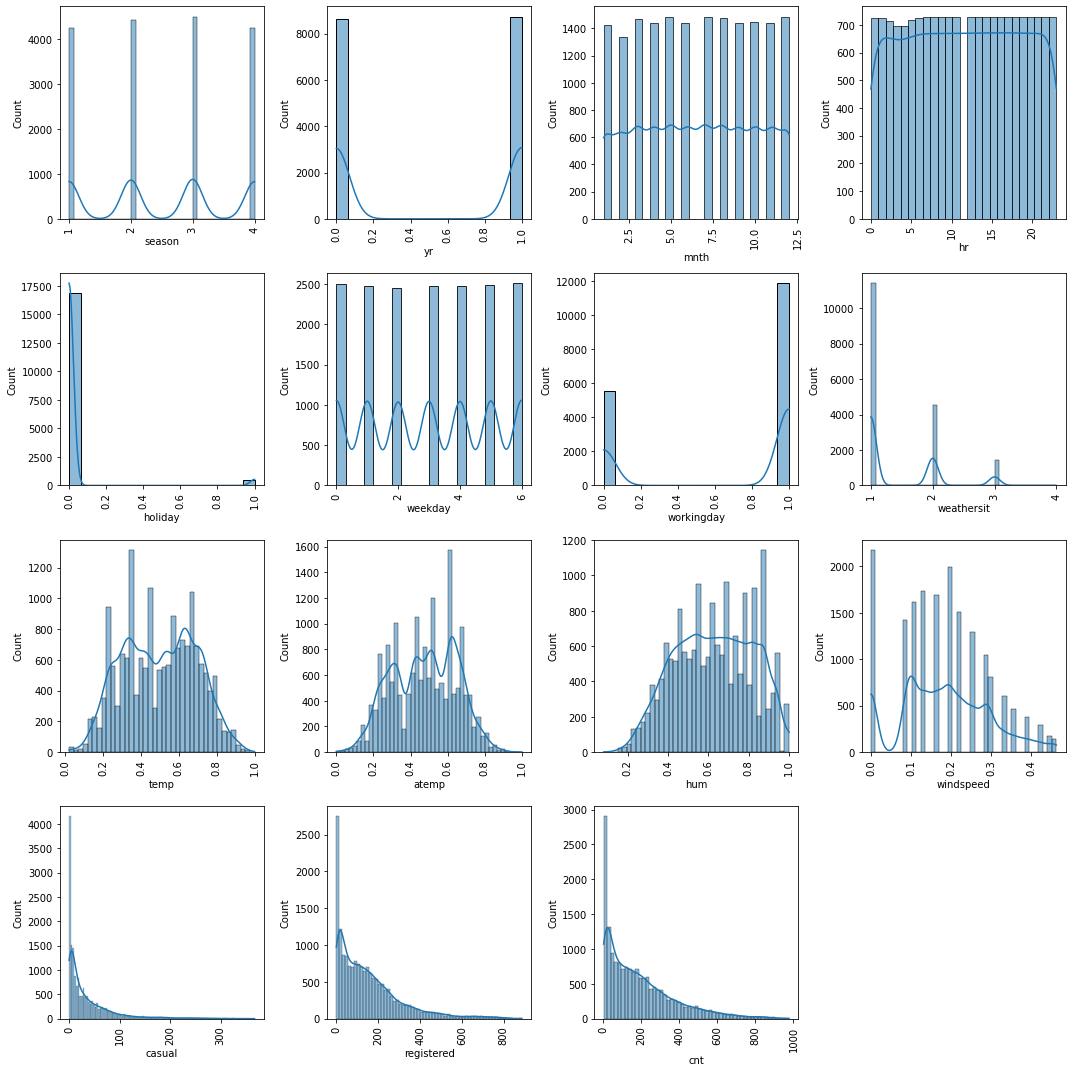

In [67]:
plt.figure(figsize=(15,15))
plotno=1
for columns in num:
    if plotno<=16:
        plt.subplot(4,4,plotno)
        sns.histplot(x=hour[columns],kde=True)
        plt.xlabel(columns)
        plt.ylabel("Count")
        plt.xticks(rotation=90)
    plotno+=1
plt.tight_layout()

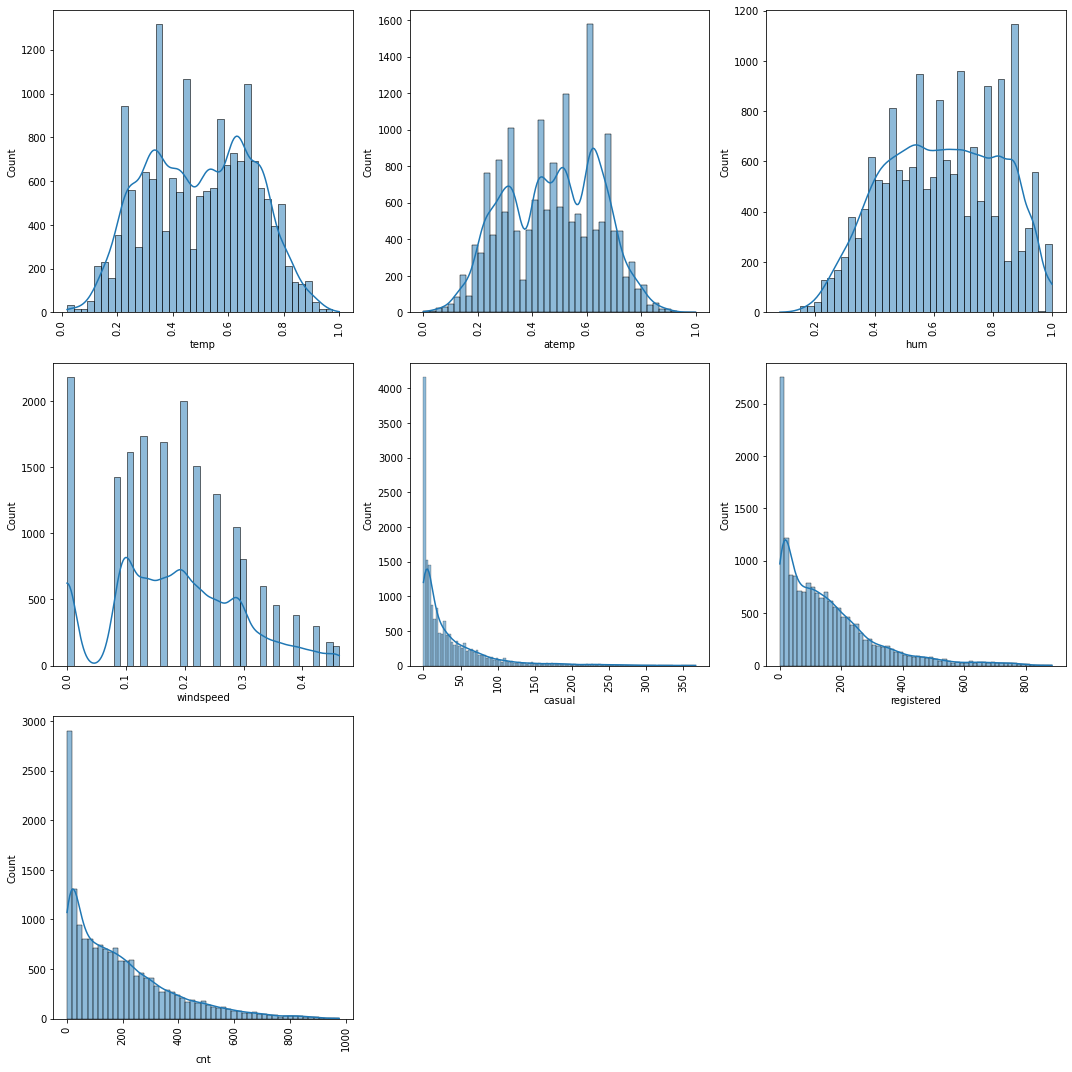

In [68]:
plt.figure(figsize=(15,15))
plotno=1
for columns in num_num:
    if plotno<=9:
        plt.subplot(3,3,plotno)
        sns.histplot(x=hour[columns],kde=True)
        plt.xlabel(columns)
        plt.ylabel("Count")
        plt.xticks(rotation=90)
    plotno+=1
plt.tight_layout()

In [69]:
def qqplot(data):
    fig,(ax1,ax2) = plt.subplots(ncols=2)
    fig.set_size_inches(15,5)
    sns.histplot(data,ax=ax1,kde=True)
    stats.probplot(data, dist='norm', fit=True, plot=ax2)

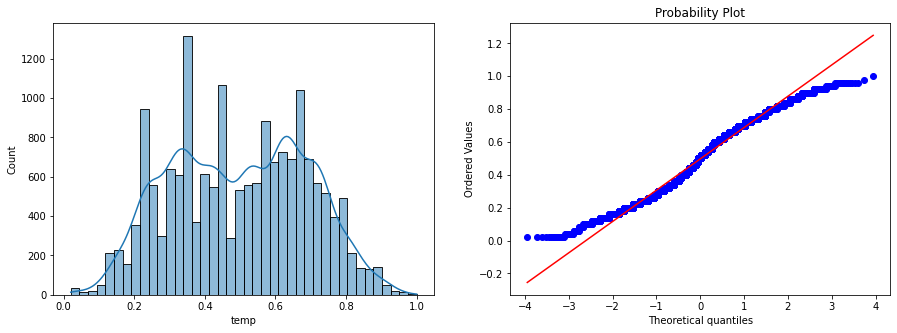

In [70]:
qqplot(hour.temp)

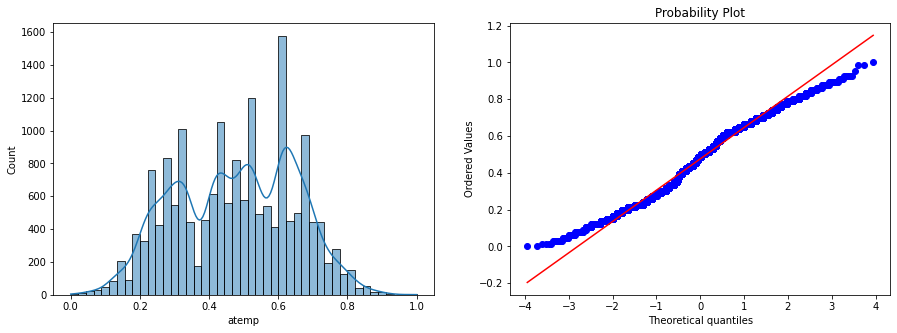

In [71]:
qqplot(hour.atemp)

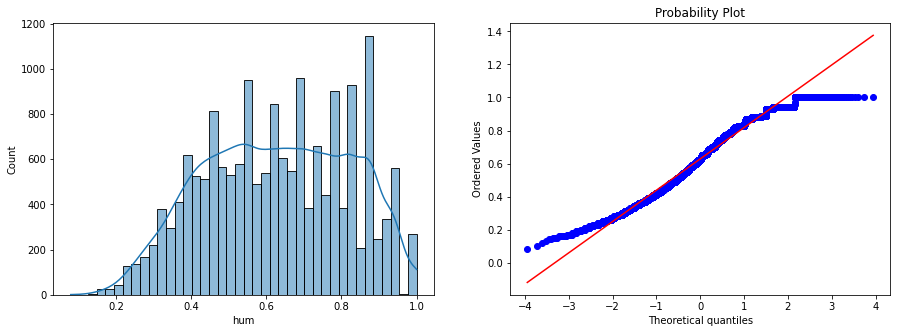

In [72]:
qqplot(hour.hum)

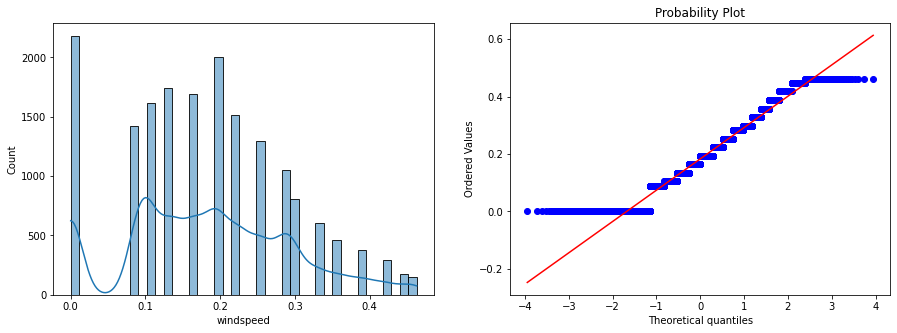

In [73]:
qqplot(hour.windspeed)

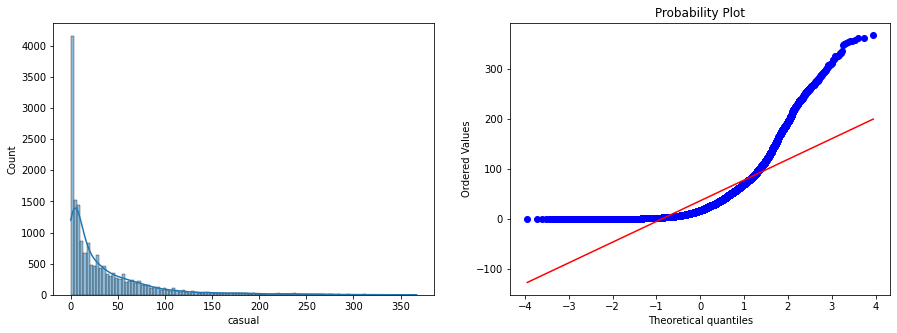

In [74]:
qqplot(hour.casual)

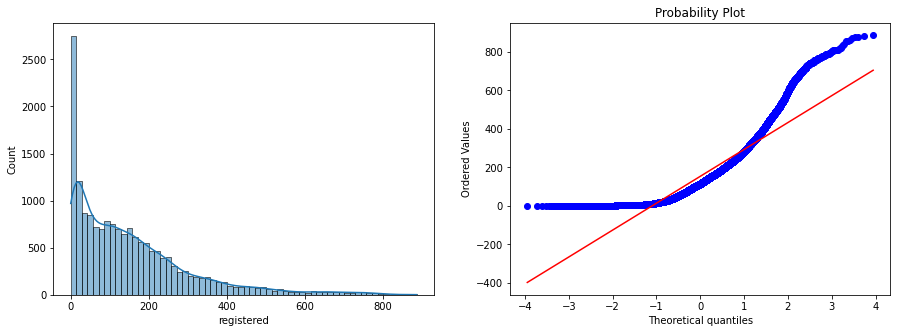

In [75]:
qqplot(hour.registered)

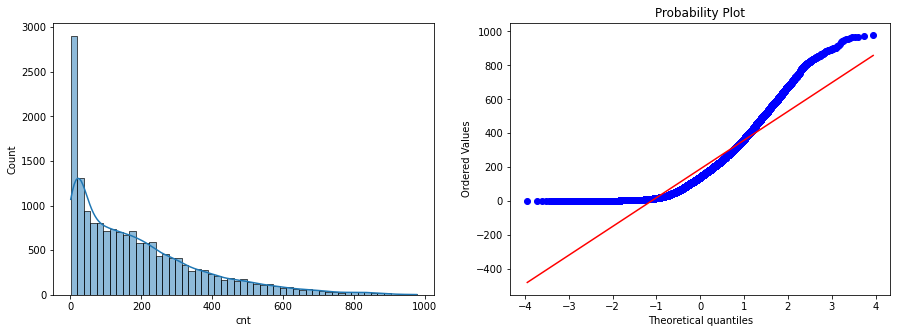

In [76]:
qqplot(hour.cnt)

In [77]:
for i in num:
    print([i])
    print(hour[i].skew())

['season']
-0.005415699379117336
['yr']
-0.010243264826335554
['mnth']
-0.00925324838268303
['hr']
-0.010679909518954298
['holiday']
5.638537992884001
['weekday']
-0.002998221376047572
['workingday']
-0.7852579601189995
['weathersit']
1.2280467231680763
['temp']
-0.006020883348272031
['atemp']
-0.09042885855903755
['hum']
-0.0816526201539055
['windspeed']
0.21939349285454365
['casual']
2.499236891330847
['registered']
1.5579042256481026
['cnt']
1.2774116037490573


In [78]:
for i in num_num:
    print([i])
    print(hour[i].skew())

['temp']
-0.006020883348272031
['atemp']
-0.09042885855903755
['hum']
-0.0816526201539055
['windspeed']
0.21939349285454365
['casual']
2.499236891330847
['registered']
1.5579042256481026
['cnt']
1.2774116037490573


In [79]:
for i in num:
    print([i])
    print(scipy.stats.skewtest(hour[i]))

['season']
SkewtestResult(statistic=-0.291566642756644, pvalue=0.7706179829495534)
['yr']
SkewtestResult(statistic=-0.5514593355294579, pvalue=0.5813188352144592)
['mnth']
SkewtestResult(statistic=-0.4981629271390877, pvalue=0.618369210301455)
['hr']
SkewtestResult(statistic=-0.5749653529752786, pvalue=0.5653147293541787)
['holiday']
SkewtestResult(statistic=115.69426017745995, pvalue=0.0)
['weekday']
SkewtestResult(statistic=-0.16141696914408146, pvalue=0.871765002480203)
['workingday']
SkewtestResult(statistic=-37.54819481144602, pvalue=1.5077480109384624e-308)
['weathersit']
SkewtestResult(statistic=52.630007775961275, pvalue=0.0)
['temp']
SkewtestResult(statistic=-0.32414755480697705, pvalue=0.745826325326562)
['atemp']
SkewtestResult(statistic=-4.858597521759679, pvalue=1.1822017538947414e-06)
['hum']
SkewtestResult(statistic=-4.3887051949178595, pvalue=1.1402751621573576e-05)
['windspeed']
SkewtestResult(statistic=11.674130641895825, pvalue=1.7282347121522246e-31)
['casual']
Skew

In [80]:
for i in num_num:
    print([i])
    print(scipy.stats.skewtest(hour[i]))

['temp']
SkewtestResult(statistic=-0.32414755480697705, pvalue=0.745826325326562)
['atemp']
SkewtestResult(statistic=-4.858597521759679, pvalue=1.1822017538947414e-06)
['hum']
SkewtestResult(statistic=-4.3887051949178595, pvalue=1.1402751621573576e-05)
['windspeed']
SkewtestResult(statistic=11.674130641895825, pvalue=1.7282347121522246e-31)
['casual']
SkewtestResult(statistic=80.80369080835057, pvalue=0.0)
['registered']
SkewtestResult(statistic=61.6344929113051, pvalue=0.0)
['cnt']
SkewtestResult(statistic=54.08201431819645, pvalue=0.0)


#### Normality Test (D’Agostino’s K-squared test)

In [81]:
def normality(data):
    stat,p=normaltest(data)
    print("Stat: %.4f,  p: %.4f\n" % (stat,p))

    if p > 0.05:
        print("Probably Gaussian")
    else:
        print("Probably not Gaussian")

In [82]:
normality(hour.temp)

Stat: 2939.4454,  p: 0.0000

Probably not Gaussian


In [83]:
normality(hour.hum)

Stat: 2535.0141,  p: 0.0000

Probably not Gaussian


In [84]:
normality(hour.casual)

Stat: 9087.7880,  p: 0.0000

Probably not Gaussian


#### Kolmogorov-Smirnov test 

In [85]:
def knormality(data):
    stats_val,p_val=kstest(data,"norm")
    print("Stat: %.4f,  p: %.4f\n" % (stats_val,p_val))

    if p_val > 0.05:
        print("Probably Gaussian")
    else:
        print("Probably not Gaussian")

In [86]:
knormality(hour.temp)

Stat: 0.5446,  p: 0.0000

Probably not Gaussian


In [87]:
knormality(hour.hum)

Stat: 0.5861,  p: 0.0000

Probably not Gaussian


In [88]:
knormality(hour.casual)

Stat: 0.8240,  p: 0.0000

Probably not Gaussian


- As there is casual and registered are added to get the count of bike rentals, therefore we can work out with any of the features so we chose to work out with "cnt" feature and drop others and even we don't need to do any transformation.

In [89]:
hour.drop(['dteday','atemp','registered','casual'],axis=1,inplace=True)

In [90]:
hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,0,0,1,0.02,0.63,0.0,1
1,1,0,1,0,0,0,0,1,0.02,0.63,0.0,1
2,1,0,1,0,0,0,0,1,0.02,0.63,0.0,1
3,1,0,1,0,0,0,0,1,0.02,0.63,0.0,1
4,1,0,1,0,0,0,0,1,0.02,0.63,0.0,1


In [91]:
hour.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc=StandardScaler()

In [94]:
hour[['season', 'yr', 'mnth', 'hr', 
      'holiday', 'weekday','workingday', 
      'weathersit', 'temp', 'hum', 'windspeed']] = sc.fit_transform(hour[['season', 'yr', 'mnth','hr', 'holiday',
                                                                                 'weekday','workingday', 'weathersit', 
                                                                                 'temp', 'hum', 'windspeed']])

In [95]:
hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,-1.356634,-1.005134,-1.610438,-1.670004,-0.172112,-1.497563,-1.4669,-0.665193,-2.477205,0.010299,-1.651213,1
1,-1.356634,-1.005134,-1.610438,-1.670004,-0.172112,-1.497563,-1.4669,-0.665193,-2.477205,0.010299,-1.651213,1
2,-1.356634,-1.005134,-1.610438,-1.670004,-0.172112,-1.497563,-1.4669,-0.665193,-2.477205,0.010299,-1.651213,1
3,-1.356634,-1.005134,-1.610438,-1.670004,-0.172112,-1.497563,-1.4669,-0.665193,-2.477205,0.010299,-1.651213,1
4,-1.356634,-1.005134,-1.610438,-1.670004,-0.172112,-1.497563,-1.4669,-0.665193,-2.477205,0.010299,-1.651213,1


In [96]:
hour.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Model Building

In [97]:
X = hour.drop(['cnt'], axis=1)
y = hour['cnt']

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Feature Selection using ExtraTreeRegressor


In [99]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [100]:
print(model.feature_importances_)

[0.22579586 0.05761447 0.10658372 0.11385109 0.02057863 0.17039446
 0.01289046 0.14654591 0.0722265  0.05257481 0.02094409]


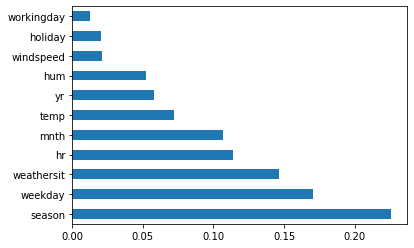

In [101]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

We can see season is the most important features.

#### RandomForest

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf_reg= RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [104]:
X_train.shape,X_test.shape

((13034, 11), (4345, 11))

In [105]:
y_pred_rf=rf_reg.predict(X_test)

In [106]:
score = metrics.r2_score(y_test, y_pred_rf) #Checking R2_Score
print('R2_Score of RandomForest: ',score)

<IPython.core.display.Javascript object>

R2_Score of RandomForest:  0.9996427088411886


In [107]:
adj_score=1-((1-score)*(4345-1)/(4345-11-1))
print("The Adjusted R2 Score for the test: " , adj_score)

The Adjusted R2 Score for the test:  0.9996418018015516


In [108]:
y_pred_rf_train=rf_reg.predict(X_train)

In [109]:
scoretrain = metrics.r2_score(y_train, y_pred_rf_train) #Checking R2_Score
print('R2_Score of RandomForest Training',scoretrain)

<IPython.core.display.Javascript object>

R2_Score of RandomForest Training 0.9996549600670169


In [110]:
mse=(metrics.mean_squared_error(y_test, y_pred_rf)) #Calculating MSE
print('MSE : ', mse) 

<IPython.core.display.Javascript object>

MSE :  11.569499129964138


In [111]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)) #Calculating RMSE
print('RMSE : ', rmse) 

<IPython.core.display.Javascript object>

RMSE :  3.401396644022002


In [112]:
err = metrics.mean_absolute_error(y_test, y_pred_rf) #Calculating mean_absolute_error
print("Mean Absolute Error", err)

<IPython.core.display.Javascript object>

Mean Absolute Error 1.8993013749574201


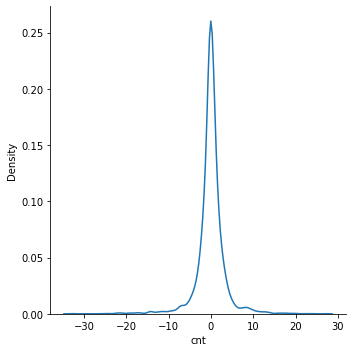

In [113]:
sns.displot(y_pred_rf-y_test,kind="kde")

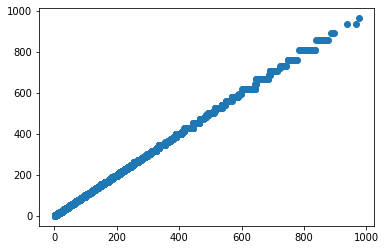

In [114]:
plt.scatter(y_test,y_pred_rf)

#### Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lr=LinearRegression()

In [117]:
lr.fit(X_train,y_train)

LinearRegression()

In [118]:
y_pred_lr=lr.predict(X_test)

In [119]:
score_lr=metrics.r2_score(y_test,y_pred_lr)
print("The R2 Score of Linear Regression Model is : " , score_lr)

<IPython.core.display.Javascript object>

The R2 Score of Linear Regression Model is :  0.9662519097134984


In [120]:
adj_score_lr=1-((1-score_lr)*(4345-1)/(4345-11-1))
print("The Adjusted R2 Score for the test: " , adj_score_lr)

The Adjusted R2 Score for the test:  0.9661662348939388


In [121]:
y_pred_lr_train=lr.predict(X_train)

In [122]:
score_train=metrics.r2_score(y_train,y_pred_lr_train)
print("The R2 Score of Linear Regression Model for Training is : " , score_train)

<IPython.core.display.Javascript object>

The R2 Score of Linear Regression Model for Training is :  0.9674871415063963


In [123]:
error_mse=(metrics.mean_squared_error(y_test, y_pred_lr)) #Calculating MSE
print('MSE : ', error_mse) 

<IPython.core.display.Javascript object>

MSE :  1092.802023163568


In [124]:
error_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)) #Calculating RMSE
print('RMSE : ', error_rmse) 

<IPython.core.display.Javascript object>

RMSE :  33.05755621886724


In [125]:
err_mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr) #Calculating mean_absolute_error
print("Mean Absolute Error", err_mae_lr)

<IPython.core.display.Javascript object>

Mean Absolute Error 24.55102161097802


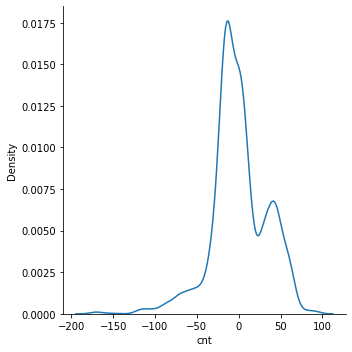

In [126]:
sns.displot(y_pred_lr-y_test,kind='kde')

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

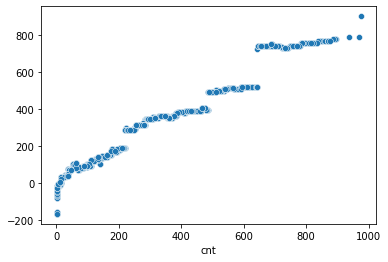

In [127]:
sns.scatterplot(y_test, y_pred_lr)

#### KNN

In [128]:
from sklearn.neighbors import KNeighborsRegressor

In [129]:
error_rate=[]
for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

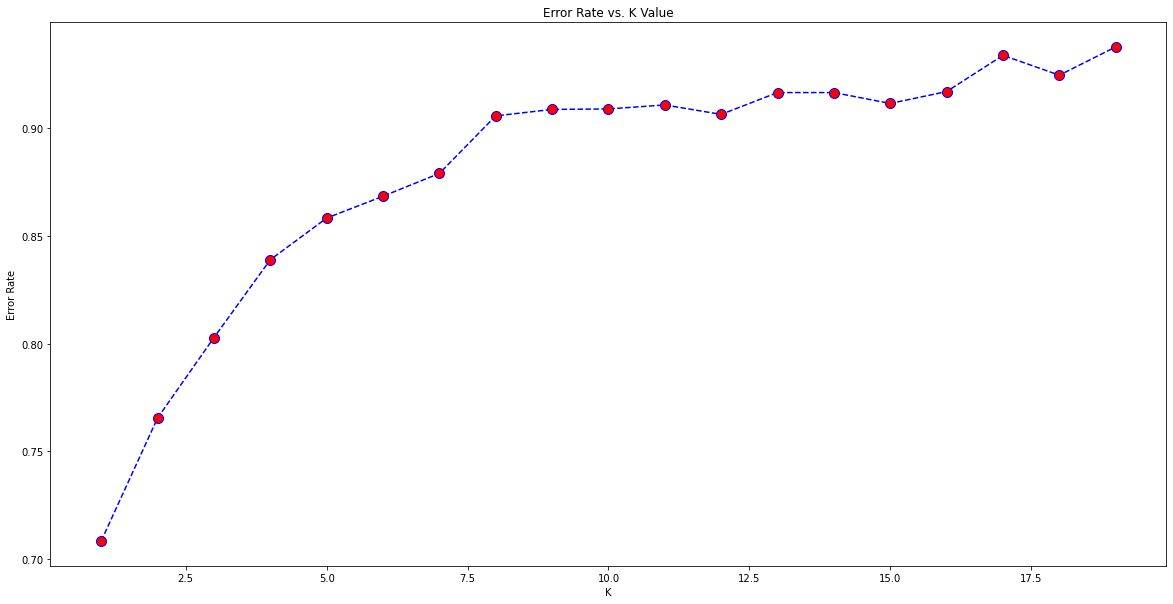

In [130]:
plt.figure(figsize=(20,10))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [131]:
knn_test = KNeighborsRegressor(n_neighbors=9)
knn_test.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [132]:
y_pred_knn = knn_test.predict(X_test)

In [133]:
score_knn=metrics.r2_score(y_test,y_pred_knn)
print("The R2 Score of KNN Regression Model is : " , score_knn)

<IPython.core.display.Javascript object>

The R2 Score of KNN Regression Model is :  0.9995408072561891


In [134]:
adj_score_knn=1-((1-score_knn)*(4345-1)/(4345-11-1))
print("The Adjusted R2 Score for the test: " , adj_score_knn)

The Adjusted R2 Score for the test:  0.9995396415233985


In [135]:
y_pred_knn_train = knn_test.predict(X_train)

In [136]:
score_knn_train=metrics.r2_score(y_train,y_pred_knn_train)
print("The R2 Score of KNN Regression Model for training is : " , score_knn_train)

<IPython.core.display.Javascript object>

The R2 Score of KNN Regression Model for training is :  0.9995745623777443


In [137]:
error_rmse_knn=np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)) #Calculating RMSE
print('RMSE : ', error_rmse_knn) 

<IPython.core.display.Javascript object>

RMSE :  3.856058841378998


In [138]:
error_mse_knn=metrics.mean_squared_error(y_test, y_pred_knn) #Calculating MSE
print('MSE : ', error_mse_knn) 

<IPython.core.display.Javascript object>

MSE :  14.86918978817714


In [139]:
err_knn = metrics.mean_absolute_error(y_test, y_pred_knn) #Calculating mean_absolute_error
print("Mean Absolute Error", err_knn)

<IPython.core.display.Javascript object>

Mean Absolute Error 2.0471806674338326


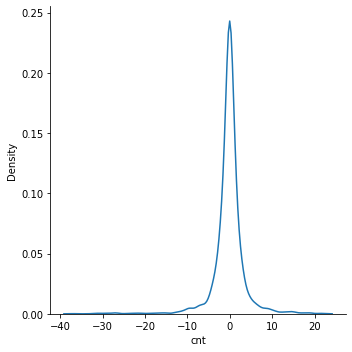

In [140]:
sns.displot(y_pred_knn-y_test,kind='kde')

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

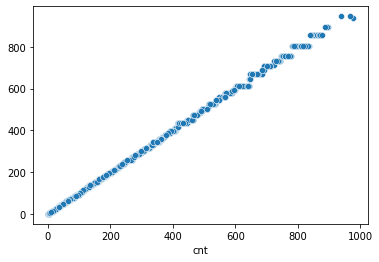

In [141]:
sns.scatterplot(y_test, y_pred_knn)

#### SVM

In [142]:
from sklearn.svm import SVR

In [143]:
svr = SVR()

In [144]:
svr.fit(X_train,y_train)

SVR()

In [145]:
y_pred_svr= svr.predict(X_test)

In [146]:
score_svr=metrics.r2_score(y_test,y_pred_svr)
print("The R2 Score of SVM Regression Model is : " , score_svr)

<IPython.core.display.Javascript object>

The R2 Score of SVM Regression Model is :  0.9860802079621069


In [147]:
adj_score_svr=1-((1-score_svr)*(4345-1)/(4345-11-1))
print("The Adjusted R2 Score for the test: " , adj_score_svr)

The Adjusted R2 Score for the test:  0.9860448703871204


In [148]:
y_pred_svr_train= svr.predict(X_train)

In [149]:
score_svr_train=metrics.r2_score(y_train,y_pred_svr_train)
print("The R2 Score of SVM Regression Model is : " , score_svr_train)

<IPython.core.display.Javascript object>

The R2 Score of SVM Regression Model is :  0.9860193065889297


In [150]:
error_rmse_svr=np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)) #Calculating RMSE
print('RMSE : ', error_rmse_svr) 

<IPython.core.display.Javascript object>

RMSE :  21.23061219834077


In [151]:
error_mse_svr=(metrics.mean_squared_error(y_test, y_pred_svr)) #Calculating RMSE
print('MSE : ', error_mse_svr) 

<IPython.core.display.Javascript object>

MSE :  450.73889431633586


In [152]:
err_svr = metrics.mean_absolute_error(y_test, y_pred_svr) #Calculating mean_absolute_error
print("Mean Absolute Error", err_svr)

<IPython.core.display.Javascript object>

Mean Absolute Error 7.210799580073778


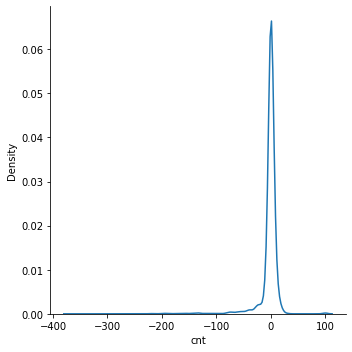

In [153]:
sns.displot(y_pred_svr-y_test,kind='kde')

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

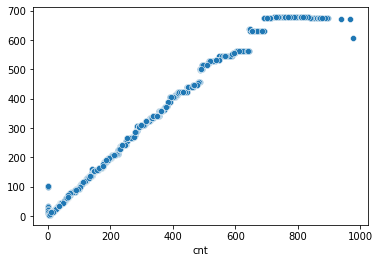

In [154]:
sns.scatterplot(y_test, y_pred_svr)

#### XGBoost

In [155]:
from xgboost import XGBRegressor

In [156]:
xgr=XGBRegressor()

In [157]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [169]:
X_test

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
12830,0.450236,0.994892,0.716038,0.788702,-0.172112,0.995315,0.68171,0.898924,0.742729,0.793068,0.636531
8688,0.450236,0.994892,0.134419,0.065553,-0.172112,-0.001836,0.68171,-0.665193,0.015647,0.010299,0.098185
7091,-0.453199,-1.005134,-0.447200,-0.368336,-0.172112,-0.500412,0.68171,-0.665193,-0.295959,-0.302808,-0.170537
12230,0.450236,0.994892,0.716038,0.644072,-0.172112,0.496740,0.68171,0.898924,0.638860,0.688699,0.636531
431,-1.356634,-1.005134,-1.610438,-1.670004,-0.172112,-1.497563,-1.46690,-0.665193,-1.750123,-1.868345,-1.651213
...,...,...,...,...,...,...,...,...,...,...,...
4731,-0.453199,-1.005134,-0.738009,-0.802225,-0.172112,-0.998987,-1.46690,-0.665193,-0.815304,-0.720284,-0.708883
15987,1.353671,0.994892,1.588467,1.511851,-0.172112,1.493891,0.68171,2.463041,1.365942,1.367098,1.578862
10347,0.450236,0.994892,0.425229,0.354813,-0.172112,0.496740,0.68171,-0.665193,0.327253,0.323407,0.367809
4111,-1.356634,-1.005134,-1.028819,-0.946855,-0.172112,-0.998987,-1.46690,-0.665193,-0.919172,-0.824653,-0.708883


In [170]:
y_test

12830    272
8688     142
7091     102
12230    247
431        3
        ... 
4731      47
15987    489
10347    187
4111      36
11971    237
Name: cnt, Length: 4345, dtype: int64

In [176]:
X_test.shape

(4345, 11)

In [177]:
y_test.shape

(4345,)

In [178]:
xgr.predict(X_test.iloc[0].values.reshape(11,0))

ValueError: cannot reshape array of size 11 into shape (11,0)

In [158]:
y_pred_xgr= xgr.predict(X_test)

In [159]:
score_xgr=metrics.r2_score(y_test,y_pred_xgr)
print("The R2 Score of XGBoost Regression Model is : " , score_xgr)

<IPython.core.display.Javascript object>

The R2 Score of XGBoost Regression Model is :  0.9996435628399158


In [160]:
adj_score_xgr=1-((1-score_xgr)*(4345-1)/(4345-11-1))
print("The Adjusted R2 Score for the test: " , adj_score_xgr)

The Adjusted R2 Score for the test:  0.9996426579682886


In [161]:
y_pred_xgr_train= xgr.predict(X_train)

In [162]:
score_xgr_train=metrics.r2_score(y_train,y_pred_xgr_train)
print("The R2 Score of XGBoost Regression Model is : " , score_xgr_train)

<IPython.core.display.Javascript object>

The R2 Score of XGBoost Regression Model is :  0.9996551697455387


In [163]:
error_rmse_xgr=np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgr)) #Calculating RMSE
print('RMSE : ', error_rmse_xgr) 

<IPython.core.display.Javascript object>

RMSE :  3.397329196269318


In [164]:
error_mse_xgr=(metrics.mean_squared_error(y_test, y_pred_xgr)) #Calculating RMSE
print('MSE : ', error_mse_xgr) 

<IPython.core.display.Javascript object>

MSE :  11.541845667823932


In [165]:
err_xgr = metrics.mean_absolute_error(y_test, y_pred_xgr) #Calculating mean_absolute_error
print("Mean Absolute Error", err_xgr)

<IPython.core.display.Javascript object>

Mean Absolute Error 1.8971250490160065


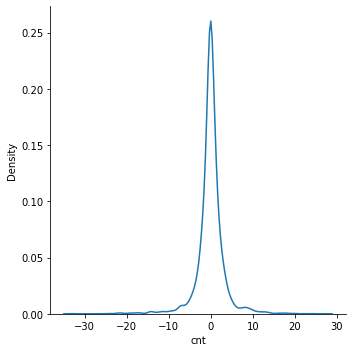

In [166]:
sns.displot(y_pred_xgr-y_test,kind='kde')

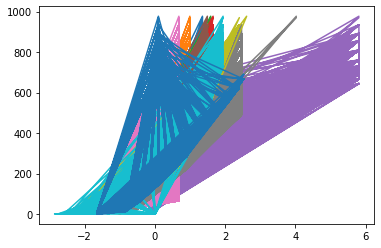

In [180]:
plt.plot(X_train,xgr.predict(X_train))

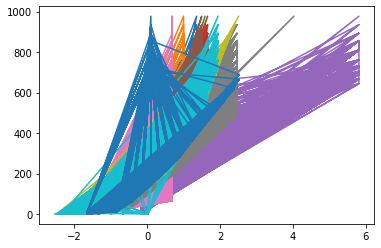

In [179]:
plt.plot(X_test,xgr.predict(X_test))

C:\Users\arink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

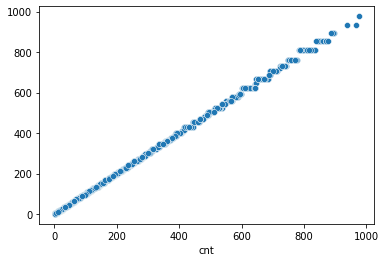

In [167]:
sns.scatterplot(y_test, y_pred_xgr)

### Scores of different model:

- RandomForest: 

    R2 Score- 99.964108%,
    Adjusted R2 Score- 99.964017%,
    MSE- 11.6221,
	RMSE- 3.4091,
	MAE- 1.9013
    
    

- Linear Regression: 

    R2 Score- 96.625190%,
	Adjusted R2 Score- 96.616623%,
	MSE- 1092.8020,
	RMSE- 33.0575,
	MAE- 24.5510
    
    

- Sector Vector Regressor: 	

    R2 Score- 98.608020%,
	Adjusted R2 Score- 98.604487%,
	MSE- 450.7388,
	RMSE- 21.2306,
	MAE- 7.2107
    
    

- K Nearest Neighbour:

    R2 Score- 99.953544%,
	Adjusted R2 Score- 99.953426%,
	MSE- 15.0427,
	RMSE- 3.8784,
	MAE- 2.0465
    
    

- XGBoost- Regressor: 	

    R2 Score- 99.964356%,
	Adjusted R2 Score- 99.964265%,
	MSE- 11.5418,
	RMSE- 3.3973,
	MAE- 1.8971



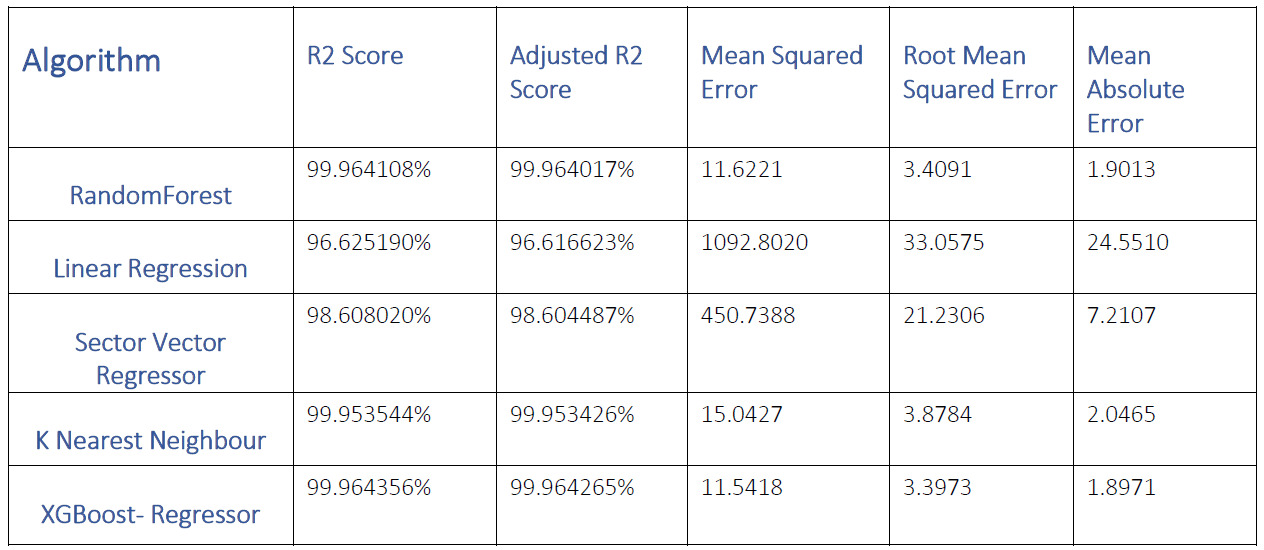

We can see all models performed well but Extreme Gradient Regressor(XGBoost-Regressor) has the highest score-
-   R2 score is 99.964356% and 
-   Adjusted R2 Score is 99.964265%.

#### Pickling

In [168]:
import pickle
# open a file, where you ant to store the data
file_xgr = open('BikeRental_XGB_Regression.pkl', 'wb')

# dump information to that file
pickle.dump(xgr, file_xgr)